In [1]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.style.use("Solarize_Light2")

## Loading Data

In [2]:
df = pd.read_csv("./data/train.csv")
df.head()

,id,photo,name,blurb,goal,slug,disable_communication,country,currency,currency_symbol,...,location,category,profile,urls,source_url,friends,is_starred,is_backing,permissions,state
0,663816109,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Angular - Where Modern Art meets Cards,Angular is a minimalist card design for simpli...,17380.0,angular-where-modern-art-meets-cards,False,US,USD,$,...,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,failed
1,1462931821,"{""small"":""https://ksr-ugc.imgix.net/assets/014...",Ladybeard is KAWAII-CORE,Original songs and music videos to jump start ...,24000.0,ladybeard-is-kawaii-core,False,US,USD,$,...,"{""country"":""JP"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,failed
2,1724358498,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Vegan Cafe Delivery Service in Vancouver BC,Our project is to launch a vegan lunch deliver...,40000.0,vegancafeca,False,CA,CAD,$,...,"{""country"":""CA"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,failed
3,314918941,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Photoetched Rail Yard Exposition,I have developed a process of my own which tra...,1000.0,photoetched-rail-yard-exposition,False,US,USD,$,...,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,successful
4,1766165140,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Cinnamon Fletcher needs to be brought to life!,Need to pay an illustrator to bring my childre...,700.0,cinnamon-fletcher-needs-to-be-brought-to-life,False,GB,GBP,Â£,...,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,failed


## Features Engineering

### Cleaning up Dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105603 entries, 0 to 105602
Data columns (total 26 columns):
id                        105603 non-null int64
photo                     105603 non-null object
name                      105601 non-null object
blurb                     105601 non-null object
goal                      105603 non-null float64
slug                      105603 non-null object
disable_communication     105603 non-null bool
country                   105603 non-null object
currency                  105603 non-null object
currency_symbol           105603 non-null object
currency_trailing_code    105603 non-null bool
deadline                  105603 non-null int64
created_at                105603 non-null int64
launched_at               105603 non-null int64
static_usd_rate           105603 non-null float64
creator                   105603 non-null object
location                  105128 non-null object
category                  105603 non-null object
profile      

In [4]:
df.isna().sum()

id                             0
photo                          0
name                           2
blurb                          2
goal                           0
slug                           0
disable_communication          0
country                        0
currency                       0
currency_symbol                0
currency_trailing_code         0
deadline                       0
created_at                     0
launched_at                    0
static_usd_rate                0
creator                        0
location                     475
category                       0
profile                        0
urls                           0
source_url                     0
friends                   105598
is_starred                105598
is_backing                105598
permissions               105598
state                          0
dtype: int64

In [5]:
drop_cols = [k for k, v in dict(df.isna().sum()).items() if v > int(df.shape[0] * 0.2)]
df.drop(drop_cols, axis=1, inplace=True)
df.dropna(inplace=True)
df.isna().sum()

id                        0
photo                     0
name                      0
blurb                     0
goal                      0
slug                      0
disable_communication     0
country                   0
currency                  0
currency_symbol           0
currency_trailing_code    0
deadline                  0
created_at                0
launched_at               0
static_usd_rate           0
creator                   0
location                  0
category                  0
profile                   0
urls                      0
source_url                0
state                     0
dtype: int64

In [6]:
df_text = df.loc[:, ["blurb", "country", "state"]]
df_text.head(10)

,blurb,country,state
0,Angular is a minimalist card design for simpli...,US,failed
1,Original songs and music videos to jump start ...,US,failed
2,Our project is to launch a vegan lunch deliver...,CA,failed
3,I have developed a process of my own which tra...,US,successful
4,Need to pay an illustrator to bring my childre...,GB,failed
5,Disassembling is a colouring book full of diss...,AU,successful
6,All-Night Yahtzee is planning on releasing our...,US,successful
7,Super Daryl Deluxe is a 2D slapstick action-RP...,US,successful
8,Shoggoth Shetani- Blind-box one of a kind coll...,US,successful
9,A practice tool to help you be more creative a...,US,successful


In [7]:
state_encodings = {v:k for k, v in enumerate(df_text.state.unique())}

def encode_state(x):
    return state_encodings[x]

df_text.loc[:, "state"] = df_text.state.apply(encode_state)
df_text.head(10)

,blurb,country,state
0,Angular is a minimalist card design for simpli...,US,0
1,Original songs and music videos to jump start ...,US,0
2,Our project is to launch a vegan lunch deliver...,CA,0
3,I have developed a process of my own which tra...,US,1
4,Need to pay an illustrator to bring my childre...,GB,0
5,Disassembling is a colouring book full of diss...,AU,1
6,All-Night Yahtzee is planning on releasing our...,US,1
7,Super Daryl Deluxe is a 2D slapstick action-RP...,US,1
8,Shoggoth Shetani- Blind-box one of a kind coll...,US,1
9,A practice tool to help you be more creative a...,US,1


In [11]:
df_text.head()

,blurb,country,state
0,Angular is a minimalist card design for simpli...,US,0
1,Original songs and music videos to jump start ...,US,0
2,Our project is to launch a vegan lunch deliver...,CA,0
3,I have developed a process of my own which tra...,US,1
4,Need to pay an illustrator to bring my childre...,GB,0


<Figure size 720x720 with 0 Axes>

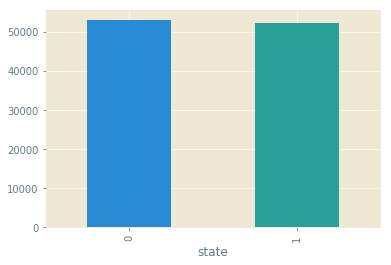

In [12]:
plt.figure(figsize=(10, 10))
df_text.groupby("state").count().plot.bar(y="blurb", ylim=0)
plt.legend().remove()
plt.show()

### Text Preprocessing

In [13]:
import re
import nltk
from nltk.corpus import wordnet as wn
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rajatrasal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
print(df_text.blurb[10])
split_blurb = re.split(r"[^a-zA-Z]+", df_text.blurb[10])
english_blurb = " ".join([word.lower() for word in split_blurb if wn.synsets(word)])
english_blurb

In this video series, RealityCheckpoint will explore Thirteen common and recurring stereotypes of male characters in video games.


'in video series will explore thirteen common recurring stereotypes male characters in video games'

In [15]:
def filter_alpha_and_lower(row):
    return " ".join(re.split(r"[^a-zA-Z]+", row)).lower()

x = df_text.blurb.apply(filter_alpha_and_lower)
x.head(10)

0    angular is a minimalist card design for simpli...
1    original songs and music videos to jump start ...
2    our project is to launch a vegan lunch deliver...
3    i have developed a process of my own which tra...
4    need to pay an illustrator to bring my childre...
5    disassembling is a colouring book full of diss...
6    all night yahtzee is planning on releasing our...
7    super daryl deluxe is a d slapstick action rpg...
8    shoggoth shetani blind box one of a kind colle...
9    a practice tool to help you be more creative a...
Name: blurb, dtype: object

In [292]:
train_size = int(len(df_text) * 0.9)

train, test = df_text.iloc[:train_size, :], df_text.iloc[train_size:, :]
X_train, y_train = train.blurb, train.state
X_test, y_test = test.blurb, test.state
f"{X_train.shape}, {y_train.shape}, {X_test.shape}, {y_test.shape}"

'(94613,), (94613,), (10513,), (10513,)'

In [244]:
np.save(open("./data/original_X_train.npy", "wb"), X_train)
np.save(open("./data/original_y_train.npy", "wb"), y_train)
np.save(open("./data/original_X_test.npy", "wb"), X_test)
np.save(open("./data/original_y_test.npy", "wb"), y_test)

In [240]:
%ls -la

total 47432
drwxr-xr-x  19 rajatrasal  staff       608  6 Jan 17:57 ./
drwxr-xr-x  23 rajatrasal  staff       736 28 Dec 23:37 ../
drwxr-xr-x  13 rajatrasal  staff       416  6 Jan 12:28 .git/
-rw-r--r--   1 rajatrasal  staff        47 16 Dec 14:03 .gitignore
-rw-r--r--   1 rajatrasal  staff        96 16 Dec 14:03 .gitlab-ci.yml
drwxr-xr-x   5 rajatrasal  staff       160  4 Jan 10:46 .ipynb_checkpoints/
-rw-r--r--   1 rajatrasal  staff      2381  2 Jan 13:44 README.md
drwxr-xr-x   3 rajatrasal  staff        96 31 Dec 19:56 __pycache__/
-rw-r--r--   1 rajatrasal  staff     87721  4 Jan 11:02 classification_of_non_text_data.ipynb
drwxr-xr-x   5 rajatrasal  staff       160 31 Dec 20:01 data/
-rw-r--r--   1 rajatrasal  staff     52526  2 Jan 18:53 features_engineering.ipynb
-rw-r--r--   1 rajatrasal  staff      3553 18 Dec 00:05 intro_numpy.py
-rw-r--r--   1 rajatrasal  staff      1319 16 Dec 14:03 intro_pandas.py
-rw-r--r--   1 rajatrasal  staff       357 16 Dec 14:03 model.py
-rw-r--r-- 

**```CountVectorizer```** tokenises the input list of sentences, by putting an array in the place of each element containing a vectorised representation of sentence. Each vectorised list contains count tokens for the frequency of each word (or n-gram) in the corpus. This array is then compressed into the scipy sparse matrix format.

**```TfidfTransformer```** transforms a count matrix to a normalised tf-idf (term-frequency time inverse document-frequency) representation by default. The goal of this normalisation is to scale down the impact of tokens which occur infrequently in a corpus. The tf-idf value increases proportionally to the number of times a word appears in a document and is offset by the number of documents which contain the word. This helps to account for the fact that some word appear more frequently than others.

The way the ```TfidfTransformer``` applies the formula below:

$$ w_{i, j} = tf_{i, j} \times log(\frac{N}{df_i}) $$

where **$tf_{i, j}$** = term-frequency of i in j (this comes directly from looking up the ```count_vect.toarray()[i][j]```), **$log_(\frac{N}{df_i})$** = inverse document-frequency, **$df_i$** = number of documents containing i, and **$N$** = the total number of documents.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer()
X_train_vec = count_vect.fit_transform(X_train)
X_train_vec.shape

(94613, 70250)

In [18]:
count_vect = CountVectorizer(stop_words="english", analyzer="word",
                             token_pattern="[a-zA-Z]+", min_df=10,
                             strip_accents="ascii", ngram_range=(1, 3))
X_train_count_vec = count_vect.fit_transform(df_text.blurb.values)
print(len(count_vect.get_feature_names()))
count_vect.get_feature_names()[0:10]

18212


['aa',
 'aaos',
 'aaron',
 'abandoned',
 'abandonment',
 'abbey',
 'abby',
 'abc',
 'abc book',
 'abducted',
 'abduction',
 'abe',
 'abilities',
 'ability',
 'able',
 'able create',
 'able make',
 'able record',
 'able share',
 'aboard',
 'abortion',
 'abraham',
 'abroad',
 'absence',
 'absolute',
 'absolutely',
 'abstract',
 'abstract art',
 'abstract paintings',
 'absurd',
 'absurdity',
 'abuse',
 'abused',
 'abusive',
 'abyss',
 'ac',
 'academic',
 'academics',
 'academy',
 'accent',
 'accept',
 'acceptance',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessible',
 'accessories',
 'accessories designed',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'acclaimed',
 'accommodate',
 'accompanied',
 'accompany',
 'accompanying',
 'accomplish',
 'accomplished',
 'according',
 'accordion',
 'account',
 'accounts',
 'accurate',
 'accurately',
 'accused',
 'ace',
 'aces',
 'achieve',
 'achieve dream',
 'achieve dreams',
 'achieve goal',
 'achieve goals',
 'achievement'

In [19]:
X_train_count_vec

<105126x18212 sparse matrix of type '<class 'numpy.int64'>'
	with 1257036 stored elements in Compressed Sparse Row format>

In [20]:
f"Number of Words: {len(count_vect.get_feature_names())}"

'Number of Words: 18212'

In [21]:
tfidf_trans = TfidfTransformer()
X_train_tfidf_trans = tfidf_trans.fit_transform(X_train_count_vec)
X_train_tfidf_trans

<105126x18212 sparse matrix of type '<class 'numpy.float64'>'
	with 1257036 stored elements in Compressed Sparse Row format>

## Models

In [293]:
train_size = int(len(X_train) * 0.9)
print(train_size)

X_train2, y_train2 = X_train.iloc[:train_size], y_train.iloc[:train_size]
X_val, y_val = X_train.iloc[train_size:], y_train.iloc[train_size:]

f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_val: {X_val.shape}, y_val: {y_val.shape}"

85151


'X_train: (94613,), y_train: (94613,), X_val: (9462,), y_val: (9462,)'

In [294]:
X_train = X_train2
y_train = y_train2

### Baseline Models

In [24]:
def compare_baseline(fitted_model, X_train, y_train, X_val, y_val):
    pred_train = fitted_model.predict(X_train)
    pred_val = fitted_model.predict(X_val)
    print(f"Training Accuracy: {accuracy_score(pred_train, y_train)}")    
    print(f"Validation Accuracy: {accuracy_score(pred_val, y_val)}")

In [25]:
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

text_clf_svc = Pipeline([
    ('vect', CountVectorizer(stop_words="english", analyzer="word",
                             token_pattern="[a-zA-Z]+", strip_accents="ascii", 
                             min_df=1, ngram_range=(1, 4))),
    ('tfidf', TfidfTransformer()),
    ('clf-svm', LinearSVC(loss="hinge", max_iter=50, random_state=42, tol=1e-10))
])

text_clf_svc.fit(X_train, y_train)

compare_baseline(text_clf_svc, X_train, y_train, X_val, y_val)

Training Accuracy: 0.9875632699557257
Validation Accuracy: 0.6833650391037835


In [298]:
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

text_clf_svc2 = Pipeline([
    ('vect', CountVectorizer(stop_words="english", analyzer="word",
                             token_pattern="[a-zA-Z]+", strip_accents="ascii", 
                             min_df=1, ngram_range=(1, 4))),
    ('tfidf', TfidfTransformer()),
    ('clf-svm', SVC(probability=True, degree=1, max_iter=200, random_state=42, tol=1e-10))
])

text_clf_svc2.fit(X_train, y_train)

compare_baseline(text_clf_svc2, X_train, y_train, X_val, y_val)

Training Accuracy: 0.5030945027069559
Validation Accuracy: 0.5078207567110548


In [26]:
from sklearn.linear_model import LogisticRegression

text_clf_lgr = Pipeline([
    ('vect', CountVectorizer(stop_words="english", analyzer="word",
                             token_pattern="[a-zA-Z]+", strip_accents="ascii", 
                             min_df=1, ngram_range=(1, 4))),
    ('tfidf', TfidfTransformer()),
    ('clf-lgr', LogisticRegression(tol=1e-10, max_iter=50))
])

text_clf_lgr.fit(X_train, y_train)

compare_baseline(text_clf_lgr, X_train, y_train, X_val, y_val)

Training Accuracy: 0.9169123087221525
Validation Accuracy: 0.6767068273092369


In [27]:
from sklearn.linear_model import SGDClassifier

text_clf_sgd = Pipeline([
    ('vect', CountVectorizer(stop_words="english", analyzer="word",
                             token_pattern="[a-zA-Z]+", strip_accents="ascii", 
                             min_df=1, ngram_range=(1, 4))),
    ('tfidf', TfidfTransformer()),
    ('clf-sgd', SGDClassifier(max_iter=50))
])

text_clf_sgd.fit(X_train, y_train)

compare_baseline(text_clf_sgd, X_train, y_train, X_val, y_val)

Training Accuracy: 0.7445361769092553
Validation Accuracy: 0.6537729866835764


In [30]:
# from sklearn.model_selection import GridSearchCV

# params = {'vect__min_df': [1, 2, 3], 'vect__ngram_range': [(1, 2), (1, 3), (1, 4)]}

# grid_search = GridSearchCV(text_clf_svc, params, scoring="accuracy")
# grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)
# compare_baseline(grid_search.best_estimator_, X_train, y_train, X_val, y_val)

# Best params:
# {'vect__min_df': 1, 'vect__ngram_range': (1, 3)}

{'vect__min_df': 1, 'vect__ngram_range': (1, 3)}
Training Accuracy: 0.9795774565184202
Validation Accuracy: 0.6832593532022828


### Neural Networks

In [28]:
vectorisation_pipline = Pipeline([
    ('vect', CountVectorizer(stop_words="english", analyzer="word",
                             token_pattern="[a-zA-Z]+", strip_accents="ascii", 
                             min_df=1, ngram_range=(1, 3))),
    ('tfidf', TfidfTransformer())
])

X_train_nn = vectorisation_pipline.fit_transform(X_train)
X_val_nn = vectorisation_pipline.transform(X_val)
f"train shape: {X_train_nn.shape}, validation shape: {X_val_nn.shape}"

'train shape: (85151, 1426575), validation shape: (9462, 1426575)'

In [234]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

def nlp_classifier_keras(input_dim):
    model = Sequential()
    model.add(Dense(256, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    
nn_model = nlp_classifier_keras(X_train_nn.shape[1])

In [235]:
nn_model.fit(X_train_nn, y_train, epochs=3, verbose=True, 
             batch_size=5000, validation_data=(X_val_nn, y_val))

ValueError: Input arrays should have the same number of samples as target arrays. Found 85151 input samples and 67280 target samples.

In [ ]:
loss, accuracy = nn_model.evaluate(X_train_vec, y_train)
print(f"Training Acc: {accuracy}")
loss, accuracy = nn_model.evaluate(X_test_vec, y_test)
print(f"Training Acc: {accuracy}")

### Advance Feature Engineering - Word2Vec and Simple Neural Network

In [39]:
df_text_c = df_text.copy()
df_text_c.head()

,blurb,country,state
0,Angular is a minimalist card design for simpli...,US,0
1,Original songs and music videos to jump start ...,US,0
2,Our project is to launch a vegan lunch deliver...,CA,0
3,I have developed a process of my own which tra...,US,1
4,Need to pay an illustrator to bring my childre...,GB,0


Main steps:
1. Remove all non-alphabetic characters.
2. Make all character lowercase.
3. Based on the country, apply a different corpus to each, using language corpuses from nltk.corpus.sysnet. - The major issue with this is that much of the sample text from other countries also contains English words in it.
4. Remove stop words for each country also.
5. Lemmatize english words.
6. Tokenise sentences. 
7. Create word embeddings using Word2Vec using Gensim. Then perform the classification task a simple Neural Network and CNN.

In [40]:
df_text_c.loc[:, "blurb"] = df_text_c.blurb.apply(filter_alpha_and_lower)
df_text_c.head()

,blurb,country,state
0,angular is a minimalist card design for simpli...,US,0
1,original songs and music videos to jump start ...,US,0
2,our project is to launch a vegan lunch deliver...,CA,0
3,i have developed a process of my own which tra...,US,1
4,need to pay an illustrator to bring my childre...,GB,0


In [41]:
df_text_c.groupby("country").count().blurb

country
AT       91
AU     1854
BE      141
CA     3693
CH      134
DE      781
DK      253
ES      415
FR      554
GB     8580
HK       46
IE      171
IT      534
LU       15
MX      245
NL      596
NO      178
NZ      369
SE      444
SG       65
US    85967
Name: blurb, dtype: int64

In [42]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
wnl.lemmatize('hardrocker')

'hardrocker'

In [43]:
from functools import partial
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

wnl = WordNetLemmatizer()

# There is no german corpus available in nltk.corpus.sysnet.wordnet.
corpus_country_map = {'IT': ['ita', 'italian'], 
                      'MX': ['spa', 'spanish'],
                      'ES': ['spa', 'spanish'], 
                      'FRA': ['fra', 'french'],
                      'BE': ['fra', 'french'],
                      'CA': ['fra', 'french']}

count = 0

def split_row_by_corpus(words, sysnet_lang='eng', stopwords_lang='english'):
    clean_words = []
    
    for word in words:
        if wn.synsets(word, lang=sysnet_lang):  # Check word in language corpus
            if word not in stopwords.words(stopwords_lang):  # Removing stop words
                clean_words.append(word)
                
    return clean_words

def apply_corpus_by_country(row):
    # global count
    split_row = re.split(r"[^a-zA-Z]+", row.blurb)
    
    split_row_func = partial(split_row_by_corpus, split_row)
    
    if row.country == 'US' or row.country == 'GB':
        split_row = split_row_func()
    elif row.country in corpus_country_map:
        eng_split_row = split_row_func()
        other_split_row = split_row_func(*corpus_country_map[row.country])
        # Even if the country is not GB or US, the blurb might still
        # be written in english
        if len(eng_split_row) > len(other_split_row):
            split_row = eng_split_row
        else:
            split_row = other_split_row
    else:
        pass
    # print(count, end=", ")
    # count += 1

    return " ".join(split_row)


df_text_features = df_text_c.loc[:, ["blurb", "country"]]
df_text_c.blurb = df_text_features.apply(apply_corpus_by_country, axis=1)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rajatrasal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rajatrasal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
df_text_c.head(20)

,blurb,country,state
0,angular minimalist card design simplicity symm...,US,0
1,original songs music videos jump start core wo...,US,0
2,project launch vegan lunch delivery service va...,CA,0
3,developed process transfers photographic image...,US,1
4,need pay illustrator bring children book life ...,GB,0
5,disassembling is a colouring book full of diss...,AU,1
6,night planning releasing next full length stud...,US,1
7,super deluxe slapstick action pc create combat...,US,1
8,blind box one kind collectible sculptures insp...,US,1
9,practice tool help creative confident experien...,US,1


In [254]:
train_size = int(len(df_text) * 0.8)

train, test = df_text_c.iloc[:train_size, :], df_text_c.iloc[train_size:, :]
X_train, y_train = train.blurb, train.state
X_test, y_test = test.blurb, test.state

np.save(open("./data/nn_X_train.npy", "wb"), X_train)
np.save(open("./data/nn_y_train.npy", "wb"), y_train)
np.save(open("./data/nn_X_test.npy", "wb"), X_test)
np.save(open("./data/nn_y_test.npy", "wb"), y_test)

f"{X_train.shape}, {y_train.shape}, {X_test.shape}, {y_test.shape}"

'(84100,), (84100,), (21026,), (21026,)'

In [206]:
train_size = int(len(X_train) * 0.8)

X_train2, y_train2 = X_train.iloc[:train_size], y_train.iloc[:train_size]
X_val, y_val = X_train.iloc[train_size:], y_train.iloc[train_size:]

X_train = X_train2
y_train = y_train2

f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_val: {X_val.shape}, y_val: {y_val.shape}"

'X_train: (67280,), y_train: (67280,), X_val: (16820,), y_val: (16820,)'

In [207]:
# def stemmer(sentence):
#     # if the country is US or GB stem each word
#     # else - stem 
#     global wnl
#     return [wnl.lemmatize(w) for w in words] if b else words

In [208]:
blurb_tokens = []

for blurb in df_text_c.blurb:
    blurb_tokens.append(blurb.split(" "))

blurb_tokens[:5]

[['angular',
  'minimalist',
  'card',
  'design',
  'simplicity',
  'symmetry',
  'style',
  'derived',
  'principles',
  'today',
  'art'],
 ['original',
  'songs',
  'music',
  'videos',
  'jump',
  'start',
  'core',
  'world',
  'tour'],
 ['project',
  'launch',
  'vegan',
  'lunch',
  'delivery',
  'service',
  'vancouver',
  'bc',
  'vegans',
  'deserve',
  'convenience',
  'nutritious',
  'food',
  'delivered'],
 ['developed',
  'process',
  'transfers',
  'photographic',
  'image',
  'galvanized',
  'steel',
  'etching',
  'plating'],
 ['need',
  'pay',
  'illustrator',
  'bring',
  'children',
  'book',
  'life',
  'see',
  'needs',
  'bit',
  'help']]

In [209]:
from gensim.models import Word2Vec

vector_dim = 100
word2vec = Word2Vec(blurb_tokens, window=3, min_count=2, size=vector_dim)
word2vec.most_similar("woman")

[('man', 0.9237178564071655),
 ('couple', 0.8785586953163147),
 ('discovers', 0.8493130207061768),
 ('girl', 0.833949863910675),
 ('mans', 0.8303358554840088),
 ('boy', 0.8261323571205139),
 ('mother', 0.8125340938568115),
 ('becomes', 0.8096308708190918),
 ('survivor', 0.7990708351135254),
 ('finds', 0.7985364198684692)]

In [210]:
embeddings_index = {}

for word in word2vec.wv.vocab.keys():
    embeddings_index[word] = word2vec.wv[word]

print(f"Found {len(embeddings_index)} word vectors.")

Found 25277 word vectors.


In [211]:
embeddings_index.get('angular')

In [212]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_val = tokenizer.texts_to_sequences(X_val)
sequences_train[:5]

[[20942, 1438, 128, 110, 3283, 20943, 107, 8052, 4530, 351, 11],
 [44, 47, 4, 380, 2242, 117, 2422, 6, 120],
 [17,
  370,
  768,
  2348,
  2071,
  720,
  3517,
  4394,
  11049,
  2652,
  6019,
  4395,
  50,
  1694],
 [1416, 427, 13991, 1061, 1245, 20944, 1162, 8595, 11050],
 [15, 632, 2096, 42, 37, 5, 10, 186, 94, 792, 1]]

In [213]:
max([len(x) for x in sequences])

32

In [214]:
len(sequences_train[0]) == len(blurb_tokens[0])

True

In [215]:
word_vector_dim = 35
X_train_seq = pad_sequences(sequences_train, maxlen=word_vector_dim)
X_val_seq = pad_sequences(sequences_val, maxlen=word_vector_dim)
print('Shape of training tensor:', X_train_seq.shape)
print('Shape of validation tensor:', X_val_seq.shape)
X_train_seq[:5]

Shape of training tensor: (67280, 35)
Shape of validation tensor: (16820, 35)


array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0, 20942,  1438,   128,
          110,  3283, 20943,   107,  8052,  4530,   351,    11],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,    44,
           47,     4,   380,  2242,   117,  2422,     6,   120],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,    17,   370,   768,  2348,  2071,   720,
         3517,  4394, 11049,  2652,  6019,  4395,    50,  1694],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,   

In [216]:
num_words = len(tokenizer.word_index) + 1
embeddings_matrix = np.zeros((num_words, vector_dim))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        print(word, i)
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector
print(f"embeddings matrix shape: {embeddings_matrix.shape}")

embeddings matrix shape: (34601, 100)


We can do a sanity check to see if our embeddings matrix works as expected. The word "minimalist" exists more than once in the corpus which is why it is present in the embeddings_index, since the ```Word2Vec``` model has ```min_count=2``` as an argument.

"Minimalist" is encoded as 1458, so 1458th embedding in the embedding matrix should be the embedding vector for the word "minimalist".

In [217]:
embeddings_index.get("minimalist")

array([ 1.0315306 , -0.40899172, -0.36170828, -0.27019477, -0.22644345,
        0.01109254, -0.10772682, -0.38952208, -0.51208115,  0.01213516,
       -1.2058303 , -0.26172122, -0.3123412 , -0.72017425,  0.93055344,
       -0.91616076,  0.52853763,  0.0145657 , -0.19217683, -0.02819219,
        0.3704908 , -0.4292066 , -0.04220184,  0.27069706,  0.72623205,
       -0.34358293,  0.39513558,  0.49910006,  0.5119326 , -0.29844648,
        0.10104945,  0.26400056,  0.4208889 ,  0.06699578,  0.20451102,
        0.1529085 ,  0.4660604 ,  0.1993793 ,  0.3271814 , -0.6944339 ,
        0.11613217,  0.41952422, -0.14570504,  0.59444374, -0.9524133 ,
        0.5000672 ,  0.44519195,  0.33549047,  0.2726839 , -0.22254805,
       -0.17940284, -0.87622184, -0.56386054, -0.28825778, -0.66566813,
       -0.18089487, -0.14201058, -0.38691983,  0.44095948,  0.2001744 ,
        0.25573054, -0.9100739 ,  0.02090381,  0.4148708 ,  0.45614368,
        0.62023   , -0.29892078, -1.0756265 , -0.12474725,  0.02

In [218]:
np.array_equal(embeddings_matrix[1458], embeddings_index.get("minimalist"))

False

In [178]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Embedding

def sentiment_simple_nn_word2vec(embeddings_matrix):
    model_w2v = Sequential()
    e = Embedding(*embeddings_matrix.shape, weights=[embeddings_matrix],
                  input_length=word_vector_dim, trainable=True)
    model_w2v.add(e)
    model_w2v.add(Flatten())
    model_w2v.add(Dense(256, activation="relu"))
    model_w2v.add(Dense(1, activation="sigmoid"))
    model_w2v.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model_w2v

print(embeddings_matrix.shape)
model_nn = sentiment_simple_nn_word2vec(embeddings_matrix)

(37932, 100)


In [181]:
model_nn.fit(X_train_seq, y_train, validation_data=(X_val_seq, y_val), 
                epochs=10, batch_size=3000, verbose=1)

Train on 85151 samples, validate on 9462 samples
Epoch 1/10
85151/85151 [==============================] - 4s 48us/step - loss: 0.5821 - acc: 0.6951 - val_loss: 0.6303 - val_acc: 0.6449
Epoch 2/10
85151/85151 [==============================] - 4s 46us/step - loss: 0.5417 - acc: 0.7323 - val_loss: 0.6279 - val_acc: 0.6482
Epoch 3/10
85151/85151 [==============================] - 4s 47us/step - loss: 0.4930 - acc: 0.7711 - val_loss: 0.6375 - val_acc: 0.6568
Epoch 4/10
85151/85151 [==============================] - 4s 48us/step - loss: 0.4269 - acc: 0.8161 - val_loss: 0.6534 - val_acc: 0.6497
Epoch 5/10
85151/85151 [==============================] - 4s 50us/step - loss: 0.3525 - acc: 0.8602 - val_loss: 0.6805 - val_acc: 0.6522
Epoch 6/10
85151/85151 [==============================] - 4s 51us/step - loss: 0.2764 - acc: 0.8988 - val_loss: 0.7398 - val_acc: 0.6362
Epoch 7/10
85151/85151 [==============================] - 4s 52us/step - loss: 0.2079 - acc: 0.9318 - val_loss: 0.8151 - val_acc:

## Word2Vec with Convolutional Neural Network

In [222]:
from tensorflow.keras.layers import (Conv1D, GlobalMaxPooling1D)

In [223]:
def sentiment_simple_cnn_word2vec(embeddings_matrix):
    model_w2v = Sequential()
    e = Embedding(*embeddings_matrix.shape, weights=[embeddings_matrix],
                  input_length=word_vector_dim, trainable=True)
    model_w2v.add(e)
    model_w2v.add(Conv1D(200, kernel_size=1, strides=1, activation="relu", padding="valid"))
    model_w2v.add(GlobalMaxPooling1D())
    model_w2v.add(Dense(256, activation="relu"))
    model_w2v.add(Dense(1, activation="sigmoid"))
    model_w2v.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model_w2v    

model_nn = sentiment_simple_cnn_word2vec(embeddings_matrix)

In [224]:
model_nn.fit(X_train_seq, y_train, validation_data=(X_val_seq, y_val), 
                epochs=5, batch_size=100, verbose=1)

Train on 67280 samples, validate on 16820 samples
Epoch 1/5
67280/67280 [==============================] - 26s 385us/step - loss: 0.6489 - acc: 0.6167 - val_loss: 0.6347 - val_acc: 0.6331
Epoch 2/5
67280/67280 [==============================] - 25s 372us/step - loss: 0.6117 - acc: 0.6609 - val_loss: 0.6233 - val_acc: 0.6481
Epoch 3/5
67280/67280 [==============================] - 26s 388us/step - loss: 0.5296 - acc: 0.7353 - val_loss: 0.6693 - val_acc: 0.6444
Epoch 4/5
10200/67280 [===>..........................] - ETA: 21s - loss: 0.4024 - acc: 0.8084

KeyboardInterrupt: 

In [232]:
from tensorflow.keras.layers import Input, concatenate, Activation
from tensorflow.keras.models import Model

def sentiment_complex_cnn_word2vec(embeddings_matrix):
    inputs = Input(shape=(word_vector_dim,), dtype="int32")
    
    encoder = Embedding(*embeddings_matrix.shape, weights=[embeddings_matrix],
                  input_length=word_vector_dim, trainable=True)(inputs)
    
    bigram_branch = Conv1D(filters=30, kernel_size=2, padding='valid', 
                           activation='relu', strides=1)(encoder)
    bigram_branch = GlobalMaxPooling1D()(bigram_branch)
    
    trigram_branch = Conv1D(filters=30, kernel_size=3, padding='valid', 
                            activation='relu', strides=1)(encoder)
    trigram_branch = GlobalMaxPooling1D()(trigram_branch)
    
    fourgram_branch = Conv1D(filters=30, kernel_size=4, padding='valid', 
                             activation='relu', strides=1)(encoder)
    fourgram_branch = GlobalMaxPooling1D()(fourgram_branch)
    
    merged = concatenate([bigram_branch, trigram_branch, fourgram_branch], axis=1)
    merged = Dense(128, activation="relu")(merged)
    merged = Dropout(0.5)(merged)
    output = Dense(1, activation="sigmoid")(merged)
    
    model = Model(inputs=[inputs], outputs=[output])
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

model_nn = sentiment_complex_cnn_word2vec(embeddings_matrix)

In [233]:
model_nn.fit(X_train_seq, y_train, validation_data=(X_val_seq, y_val), 
             epochs=10, batch_size=1000, verbose=1)

Train on 67280 samples, validate on 16820 samples
Epoch 1/5
67280/67280 [==============================] - 26s 389us/step - loss: 0.6772 - acc: 0.5897 - val_loss: 0.6511 - val_acc: 0.6151
Epoch 2/5
67280/67280 [==============================] - 26s 382us/step - loss: 0.6418 - acc: 0.6274 - val_loss: 0.6446 - val_acc: 0.6228
Epoch 3/5
67280/67280 [==============================] - 26s 387us/step - loss: 0.6245 - acc: 0.6492 - val_loss: 0.6337 - val_acc: 0.6361
Epoch 4/5
67280/67280 [==============================] - 26s 387us/step - loss: 0.6044 - acc: 0.6716 - val_loss: 0.6265 - val_acc: 0.6451
Epoch 5/5
67280/67280 [==============================] - 26s 387us/step - loss: 0.5724 - acc: 0.7008 - val_loss: 0.6324 - val_acc: 0.6373


In [ ]:
# class MeanEmbeddingVectorizer(object):
#     def __init__(self, word2vec):
#         self.word2vec = word2vec
#         # if a text is empty we should return a vector of zeros
#         # with the same dimensionality as all the other vectors
#         self.dim = len(word2vec.wv.syn0[0])

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         tokens = []
#         for row in X:
#             tokens.append(re.split(r"[^a-zA-Z]+", row))
            
#         return np.array([
#            np.mean([self.word2vec.wv[word] for word in sentence if word in self.word2vec.wv]
#                    or [np.zeros(self.dim)], axis=0)
#            for sentence in tokens
#         ])
            
# #         embeddings = np.zeros((len(tokens), self.dim))
# #         for i in range(self.dim):  # tokens:
# #             sentence_len = len(tokens[i])
# #             embedding = np.zeros((sentence_len, self.dim))
# #             for j in range(sentence_len):
# #                 word = tokens[i][j]
# #                 if word in self.word2vec.wv or [np.zeros(self.dim)]:
# #                     embedding[j] = self.word2vec.wv[word]
# #                 else:
# #                     embedding[j] = np.zeros(self.dim)
# #             embeddings[i] = np.mean(embedding)
            
# #         return embeddings
            
#     def fit_transform(self, X, y=None):
#         return self.transform(X)

In [ ]:
# from sklearn.svm import LinearSVC
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score

# mean_embedding_vectorizer = MeanEmbeddingVectorizer(word2vec)
# mean_embedded =  mean_embedding_vectorizer.fit_transform(X_train)

# svc2 = LinearSVC(loss="hinge", max_iter=200, random_state=42, tol=1e-10)
# svc2.fit(mean_embedded, y_train)
# pred = svc2.predict(mean_embedded)
# accuracy = accuracy_score(pred, y_train)
# print(f"Training Acc: {accuracy}")

# mean_embedded_test =  mean_embedding_vectorizer.fit_transform(X_test)
# pred_test = svc2.predict(mean_embedded_test)
# accuracy = accuracy_score(pred_test, y_test)
# print(f"validation acc: {accuracy}")

In [ ]:
# rdm_forest_clf = RandomForestClassifier(n_estimators=200, max_depth=50)
# rdm_forest_clf.fit(mean_embedded, y_train)
# pred = rdm_forest_clf.predict(mean_embedded)
# accuracy = accuracy_score(pred, y_train)
# print(f"Training Acc: {accuracy}")

# pred_test = rdm_forest_clf.predict(mean_embedded_test)
# accuracy = accuracy_score(pred_test, y_test)
# print(f"validation acc: {accuracy}")

In [ ]:
nn_model_2.fit(mean_embedded, y_train, epochs=5, verbose=True, 
               batch_size=5000, validation_data=(mean_embedded_test, y_test))

In [ ]:
loss, accuracy = nn_model.evaluate(mean_embedded, y_train)
print(f"Training Acc: {accuracy}")
loss, accuracy = nn_model.evaluate(mean_embedded_test, y_test)
print(f"Training Acc: {accuracy}")

## Final Model Evaluation

### Advance Feature Engineering with CNN

Whether to use advance feature engineering. Compare CNN with best SKlearn estimator.

In [255]:
# Original training and test set
X_train = pd.Series(np.load(open("./data/nn_X_train.npy", "rb")))
y_train = np.load(open("./data/nn_y_train.npy", "rb"))
X_test = pd.Series(np.load(open("./data/nn_X_test.npy", "rb")))
y_test = np.load(open("./data/nn_y_test.npy", "rb"))

f"{X_train.shape}, {y_train.shape}, {X_test.shape}, {y_test.shape}"

'(84100,), (84100,), (21026,), (21026,)'

### SVC

In [286]:
text_clf_svc.fit(X_train, y_train)
pred_svc_bin = text_clf_svc.predict(X_test)

In [287]:
accuracy_score(y_test, pred_svc_bin)

0.6732141158565585

### CNN

In [288]:
sequence_test = tokenizer.texts_to_sequences(X_test)
X_test_seq = pad_sequences(sequence_test, maxlen=word_vector_dim)
pred_cnn = model_nn.predict(X_test_seq)
model_nn.evaluate(X_test_seq, y_test)

21026/21026 [==============================] - 2s 97us/step


[0.6277800818089696, 0.6469133453819081]

### Comparison

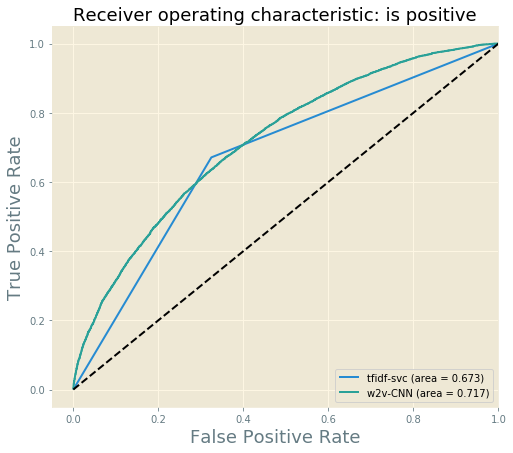

In [290]:
from sklearn.metrics import roc_curve, auc

fpr_svc, tpr_svc, threshold_svc = roc_curve(y_test, pred_svc_bin)
roc_auc_svc = auc(fpr_svc, tpr_svc)

fpr_cnn, tpr_cnn, threshold_cnn = roc_curve(y_test, pred_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

plt.figure(figsize=(8,7))
plt.plot(fpr, tpr, label='tfidf-svc (area = %0.3f)' % roc_auc_svc, linewidth=2)
plt.plot(fpr_cnn, tpr_cnn, label='w2v-CNN (area = %0.3f)' % roc_auc_cnn, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic: is positive', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## References

[] https://machinelearningmastery.com/clean-text-machine-learning-python/

[] https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72

[] https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a

[] https://medium.com/@dobko_m/nlp-text-data-cleaning-and-preprocessing-ea3ffe0406c1

[] https://medium.com/data-from-the-trenches/text-classification-the-first-step-toward-nlp-mastery-f5f95d525d73

[] http://www.nltk.org/howto/wordnet.html

[] https://realpython.com/python-keras-text-classification/

[] http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/

[] https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

[] https://towardsdatascience.com/word-embedding-with-word2vec-and-fasttext-a209c1d3e12c

[] https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-11-cnn-word2vec-41f5e28eda74